<IPython.core.display.Javascript object>

<Axes: >

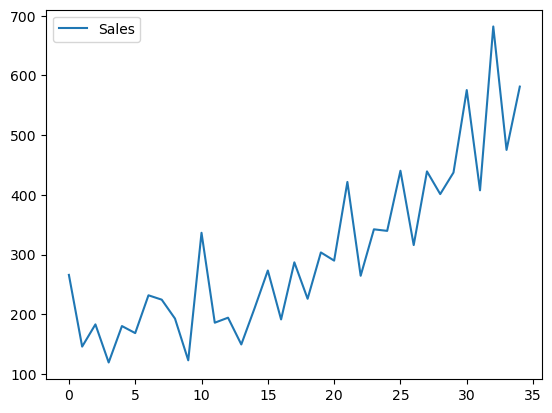

In [28]:
from pyforest import *
from statsmodels.tsa.arima.model import ARIMA

shampoo = pd.read_csv('./data/shampoo_sales.csv', header=0, usecols=[1]).iloc[:-1]
shampoo.plot()

In [29]:
shampoo.head()

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


In [57]:
# train_test_split for time series is not random!
train, test = shampoo.iloc[:23], shampoo.iloc[23:]

In [58]:
train.shape, test.shape

((23, 1), (12, 1))

#### AR1 Model

In [59]:
# order = (p, d, g)
        # p - autoregressive(AR)
        # d - differences
        # q - moving Average(MR)

ar1 = ARIMA(train, order=(1,0,0)).fit()
train_pred = ar1.predict()
test_pred = ar1.forecast(12)

In [84]:
print(len(test), len(test_pred))
print(len(train), len(train_pred))

12 12
23 23


In [61]:
print(ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   23
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -130.180
Date:                Mon, 07 Aug 2023   AIC                            266.360
Time:                        10:37:06   BIC                            269.766
Sample:                             0   HQIC                           267.216
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.6498     21.672     10.412      0.000     183.174     268.126
ar.L1          0.2113      0.233      0.906      0.365      -0.246       0.668
sigma2      4818.0997   1604.961      3.002      0.0

#### Metric of success is AIC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

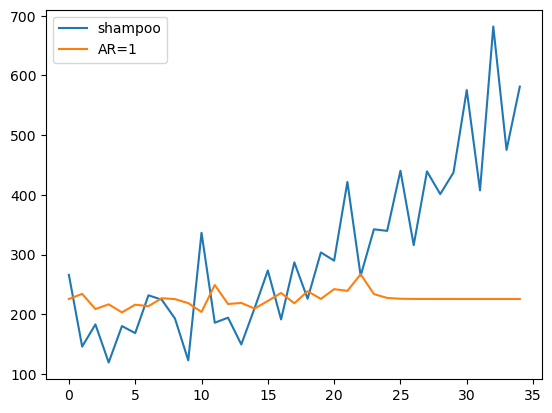

In [62]:
plt.plot(shampoo, label='shampoo')
plt.plot(pd.concat([train_pred, test_pred], axis=0), label='AR=1')
plt.legend();

In [63]:
from sklearn.metrics import mean_squared_error

print('Train RMSE:', mean_squared_error(train, train_pred)**0.5)
print('Test RMSE:', mean_squared_error(test, test_pred)**0.5)

Train RMSE: 69.43470069438791
Test RMSE: 250.39365502426907


#### AR2 model

In [64]:
ar2 =ARIMA(train, order=(2,0,0)).fit()
ar2preds = ar2.predict()
print(ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   23
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -128.531
Date:                Mon, 07 Aug 2023   AIC                            265.062
Time:                        10:37:18   BIC                            269.604
Sample:                             0   HQIC                           266.204
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.0172     32.376      7.197      0.000     169.561     296.473
ar.L1          0.1264      0.234      0.539      0.590      -0.333       0.586
ar.L2          0.4442      0.267      1.662      0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

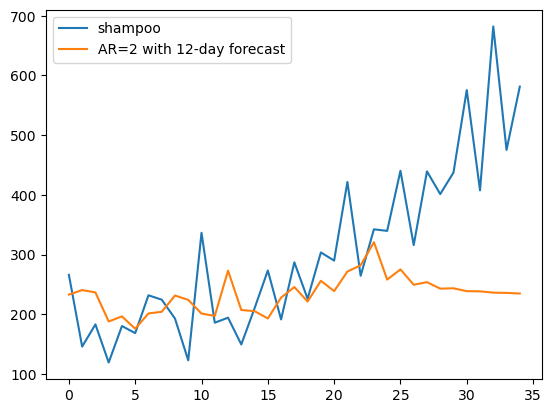

In [65]:
plt.plot(shampoo, label='shampoo')

forecast_12_days = pd.concat([ar2preds, ar2.forecast(12)])

# Plot the 'ar2preds' dataset along with the 12-day forecast
plt.plot(forecast_12_days, label='AR=2 with 12-day forecast')

# Add a legend to the plot
plt.legend();

In [66]:
print('Train RMSE:', mean_squared_error(train, ar2preds)**0.5)
print('Test RMSE:', mean_squared_error(test, ar2.forecast(12))**0.5)

Train RMSE: 64.6702824829849
Test RMSE: 233.45453823795688


#### Differencing the time series

<IPython.core.display.Javascript object>

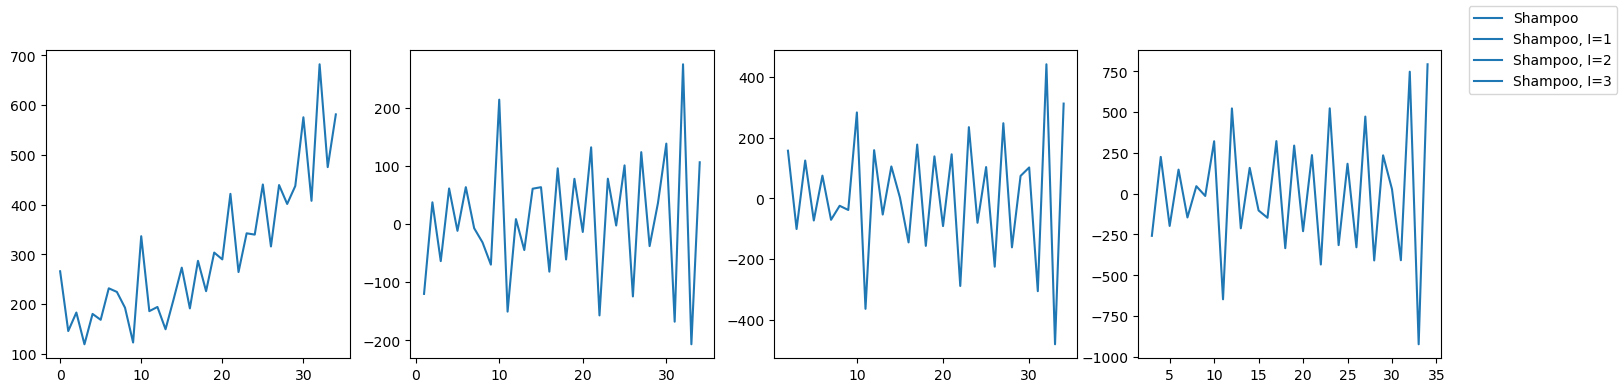

In [72]:
diff = shampoo.diff()
diff2 = diff.diff()
diff3 = diff2.diff()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))

ax1.plot(shampoo, label='Shampoo')
ax2.plot(diff, label='Shampoo, I=1')
ax3.plot(diff2, label='Shampoo, I=2')
ax4.plot(diff3, label='Shampoo, I=3')

fig.legend();

### <center> ARIMA</center>

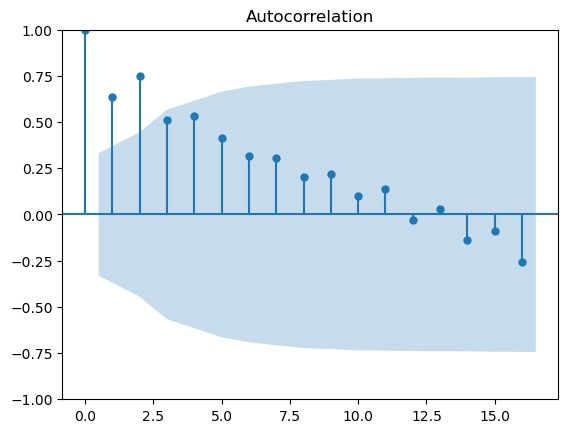

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plotting autocorrelation for each lag
plot_acf(shampoo, alpha=.05);

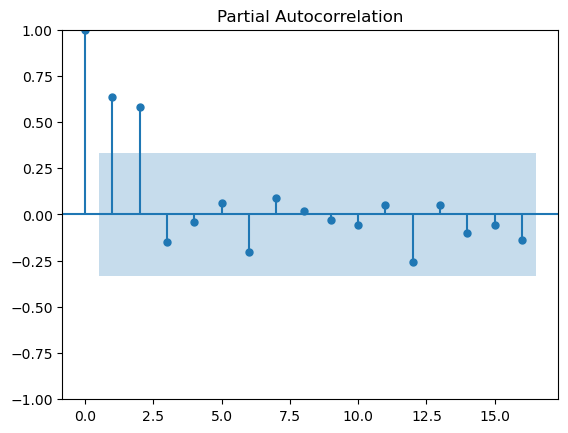

In [104]:
plot_pacf(shampoo, alpha=0.05);

In [101]:
from statsmodels.tsa.arima.model import ARIMA

# fit
arimal = ARIMA(train, order=(3,1,1)).fit()

# trainpred = np.append(np.array([0, 0]), np.array(arimal.predict()))
trainpred = np.array(arimal.predict())
testpred = arimal.forecast(12)

print(arimal.summary())

<IPython.core.display.Javascript object>

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   23
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -122.776
Date:                Mon, 07 Aug 2023   AIC                            255.553
Time:                        13:03:10   BIC                            261.008
Sample:                             0   HQIC                           256.838
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6817      0.684     -0.997      0.319      -2.022       0.659
ar.L2         -0.2985      0.632     -0.472      0.637      -1.538       0.941
ar.L3         -0.3590      0.373     -0.962      0.3

In [100]:
testpred, trainpred

(23    347.513555
 24    299.406757
 25    325.965900
 26    310.928919
 27    319.331076
 28    314.603923
 29    317.253973
 30    315.765575
 31    316.600719
 32    316.131880
 33    316.395010
 34    316.247311
 Name: predicted_mean, dtype: float64,
 array([  0.        , 264.44266601, 227.59317584, 178.42119771,
        177.50220437, 151.75349625, 171.56014647, 176.33460425,
        207.6312567 , 209.11619925, 188.80549569, 177.98279332,
        256.63274984, 205.14353258, 196.69545709, 178.32674075,
        208.62221224, 234.23441731, 215.8329114 , 251.91637702,
        241.3577015 , 276.85690367, 296.0999355 ]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

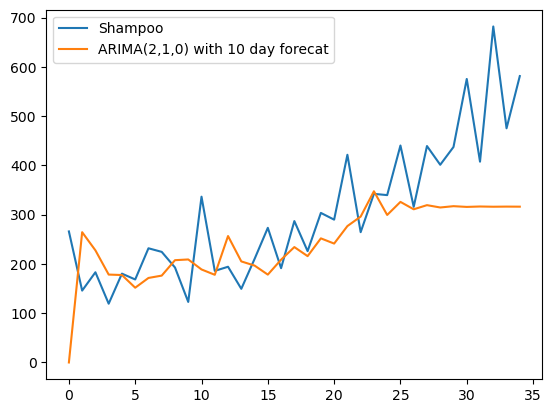

In [96]:
plt.plot(shampoo, label='Shampoo')
plt.plot(np.append(trainpred, testpred), label='ARIMA(2,1,0) with 10 day forecat') 
plt.legend();

In [97]:
print('Train RMSE:', mean_squared_error(train, trainpred)**0.5)
print('Test RMSE:', mean_squared_error(test, testpred)**0.5)

Train RMSE: 86.5754050154472
Test RMSE: 172.29346752055102


#### <center>ARIMA</center>